In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sales=pd.read_csv('train.csv',na_values={'Item_Visibility':[0]})

In [3]:
test=pd.read_csv('test.csv',na_values={'Item_Visibility':[0]})

In [4]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Exploratory data analysis
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,7997.0,0.070482,0.050308,0.003575,0.031403,0.057792,0.098109,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
sales.shape

(8523, 12)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              7997 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Exploring categorical features
categorical_features=sales.select_dtypes(include=[object])
categorical_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [10]:
sales['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRE49     9
FDP25     9
FDV60     9
FDF52     9
FDD38     9
NCL31     9
FDW49     9
FDF56     9
FDX04     9
FDQ40     9
NCB18     9
FDV38     9
NCY18     9
FDU12     9
NCF42     9
FDW26     9
FDG09     9
FDT07     9
NCQ06     9
NCJ30     9
FDX31     9
FDX20     9
DRN47     9
FDO19     9
NCI54     9
FDR04     8
FDZ20     8
FDY47     8
         ..
FDD48     2
NCS41     2
FDA48     2
NCC55     2
FDP15     2
FDW10     2
DRC24     2
FDB47     2
FDH22     2
FDI36     2
FDG28     2
NCW30     2
FDD22     2
FDM16     2
FDR57     2
FDT33     2
NCM42     2
FDW58     2
FDE38     2
FDB10     2
DRI59     2
FDQ60     1
FDN52     1
FDK57     1
FDC23     1
DRF48     1
FDY43     1
FDE52     1
FDT35     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

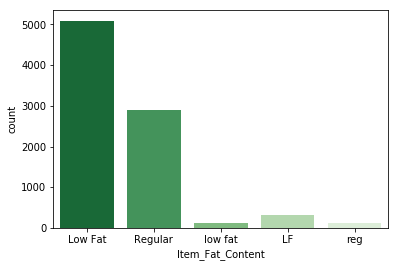

In [11]:
sns.countplot(x='Item_Fat_Content',data=sales,palette='Greens_r')

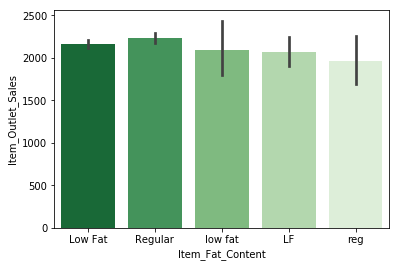

In [12]:
#Plot Fat content Vs Sales
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=sales,palette='Greens_r')

In [13]:
sales.groupby('Item_Fat_Content',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Item_Fat_Content,Item_Outlet_Sales
1,Low Fat,1.101503e+07
2,Regular,6.457454e+06
0,LF,6.552424e+05
3,low fat,2.338270e+05
4,reg,2.295765e+05


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

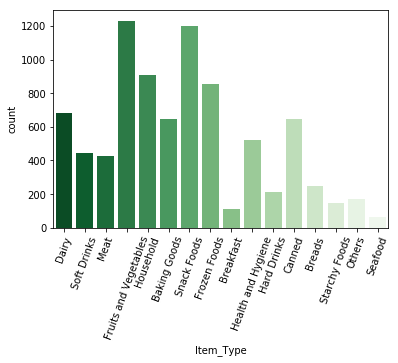

In [14]:
sns.countplot(x='Item_Type',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

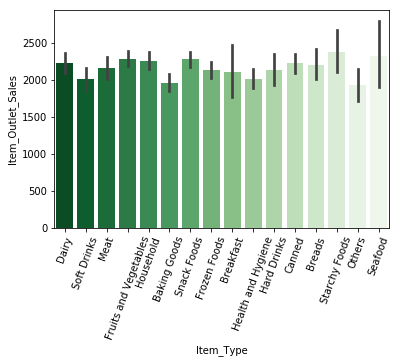

In [15]:
#Plot Item type Vs Sales
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

In [16]:
sales.groupby('Item_Type',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Item_Type,Item_Outlet_Sales
6,Fruits and Vegetables,2.820060e+06
13,Snack Foods,2.732786e+06
9,Household,2.055494e+06
5,Frozen Foods,1.825735e+06
4,Dairy,1.522594e+06
3,Canned,1.444151e+06
0,Baking Goods,1.265525e+06
8,Health and Hygiene,1.045200e+06
10,Meat,9.175656e+05
14,Soft Drinks,8.928977e+05


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

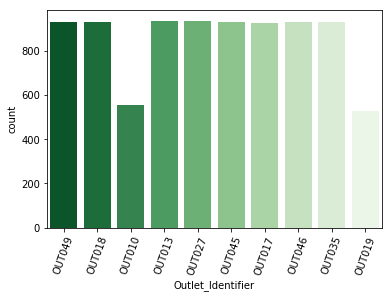

In [17]:
sns.countplot(x='Outlet_Identifier',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

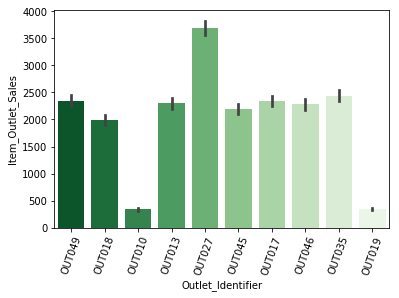

In [18]:
#Plot Outlet identifier Vs Average Sales
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

In [19]:
sales.groupby('Outlet_Identifier',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Identifier,Item_Outlet_Sales
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
9,OUT049,2.183970e+06
2,OUT017,2.167465e+06
1,OUT013,2.142664e+06
8,OUT046,2.118395e+06
7,OUT045,2.036725e+06
3,OUT018,1.851823e+06
0,OUT010,1.883402e+05
4,OUT019,1.796941e+05


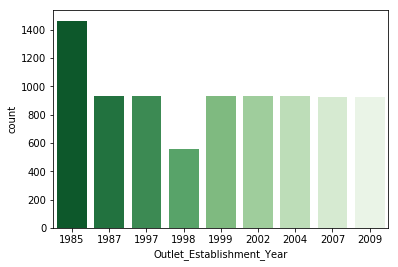

In [20]:
sns.countplot(x='Outlet_Establishment_Year',data=sales,palette='Greens_r')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

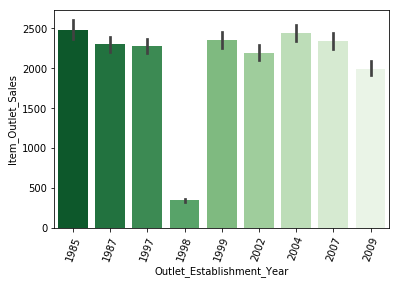

In [21]:
#Plot Outlet establishment year Vs Average Sales
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

In [22]:
sales.groupby('Outlet_Establishment_Year',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,3.633620e+06
6,2004,2.268123e+06
4,1999,2.183970e+06
7,2007,2.167465e+06
1,1987,2.142664e+06
2,1997,2.118395e+06
5,2002,2.036725e+06
8,2009,1.851823e+06
3,1998,1.883402e+05


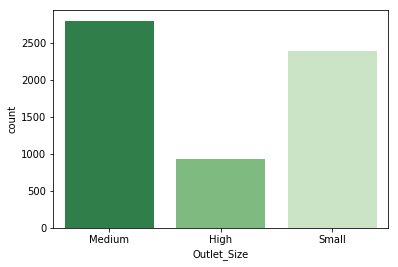

In [23]:
sns.countplot(x='Outlet_Size',data=sales,palette='Greens_r')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

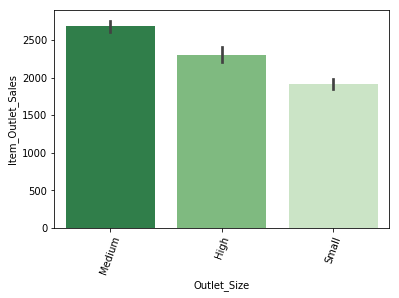

In [24]:
#Plot Outlet size Vs Average Sales
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

In [25]:
sales.groupby('Outlet_Size',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Size,Item_Outlet_Sales
1,Medium,7.489719e+06
2,Small,4.566212e+06
0,High,2.142664e+06


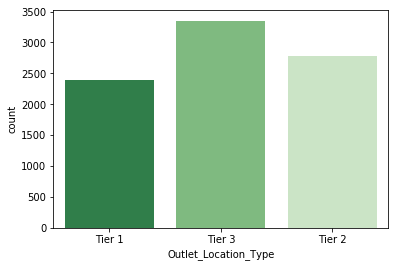

In [26]:
sns.countplot(x='Outlet_Location_Type',data=sales,palette='Greens_r')

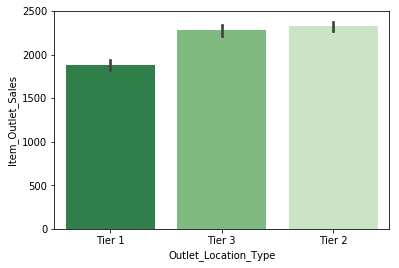

In [27]:
#Location type Vs Average sales
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales,palette='Greens_r')

In [28]:
sales.groupby('Outlet_Location_Type',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Location_Type,Item_Outlet_Sales
2,Tier 3,7.636753e+06
1,Tier 2,6.472314e+06
0,Tier 1,4.482059e+06


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

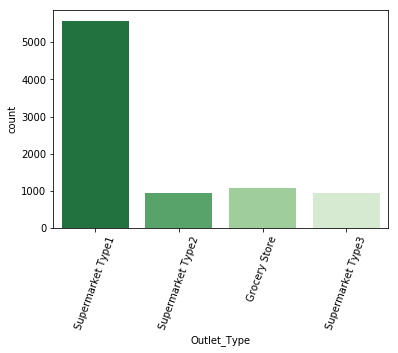

In [29]:
sns.countplot(x='Outlet_Type',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

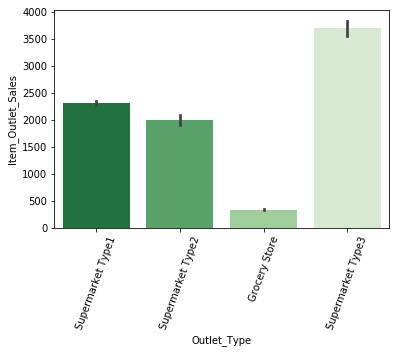

In [30]:
#Outlet type Vs Average sales
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales,palette='Greens_r')
plt.xticks(rotation=70)

In [31]:
sales.groupby('Outlet_Type',as_index=False)['Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)

,Outlet_Type,Item_Outlet_Sales
1,Supermarket Type1,1.291734e+07
3,Supermarket Type3,3.453926e+06
2,Supermarket Type2,1.851823e+06
0,Grocery Store,3.680343e+05


Skewness :  1.1775306028542798
Kurtosis :  1.6158766814287264


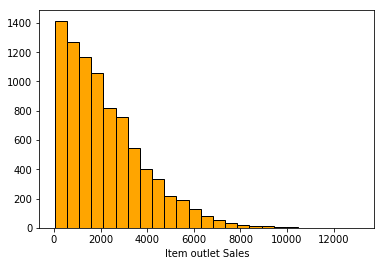

In [32]:
#Predicted variable
plt.hist(sales['Item_Outlet_Sales'],bins=25,color='orange',edgecolor='black')
plt.xlabel('Item outlet Sales')
print('Skewness : ',sales['Item_Outlet_Sales'].skew())
print('Kurtosis : ',sales['Item_Outlet_Sales'].kurt())

In [33]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [34]:
#Exploring continuous features
continuous_features=sales.select_dtypes(exclude=[object])

In [35]:
continuous_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [36]:
#Checking correlation among IVs
corr=continuous_features.corr()

In [37]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.021250,0.027141,-0.011588,0.014123
Item_Visibility,-0.021250,1.000000,-0.005700,-0.080920,-0.138558
Item_MRP,0.027141,-0.005700,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.080920,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.138558,0.567574,-0.049135,1.000000


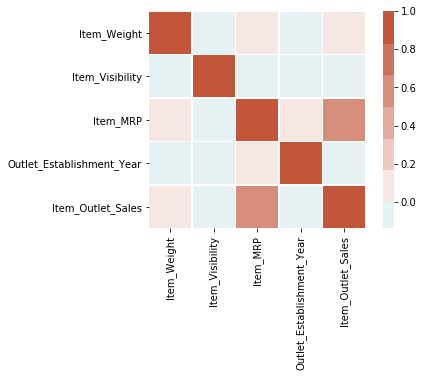

In [38]:
sns.heatmap(corr,cmap=sns.diverging_palette(200,20,n=12),square=True,linewidth=0.4,center=0)

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


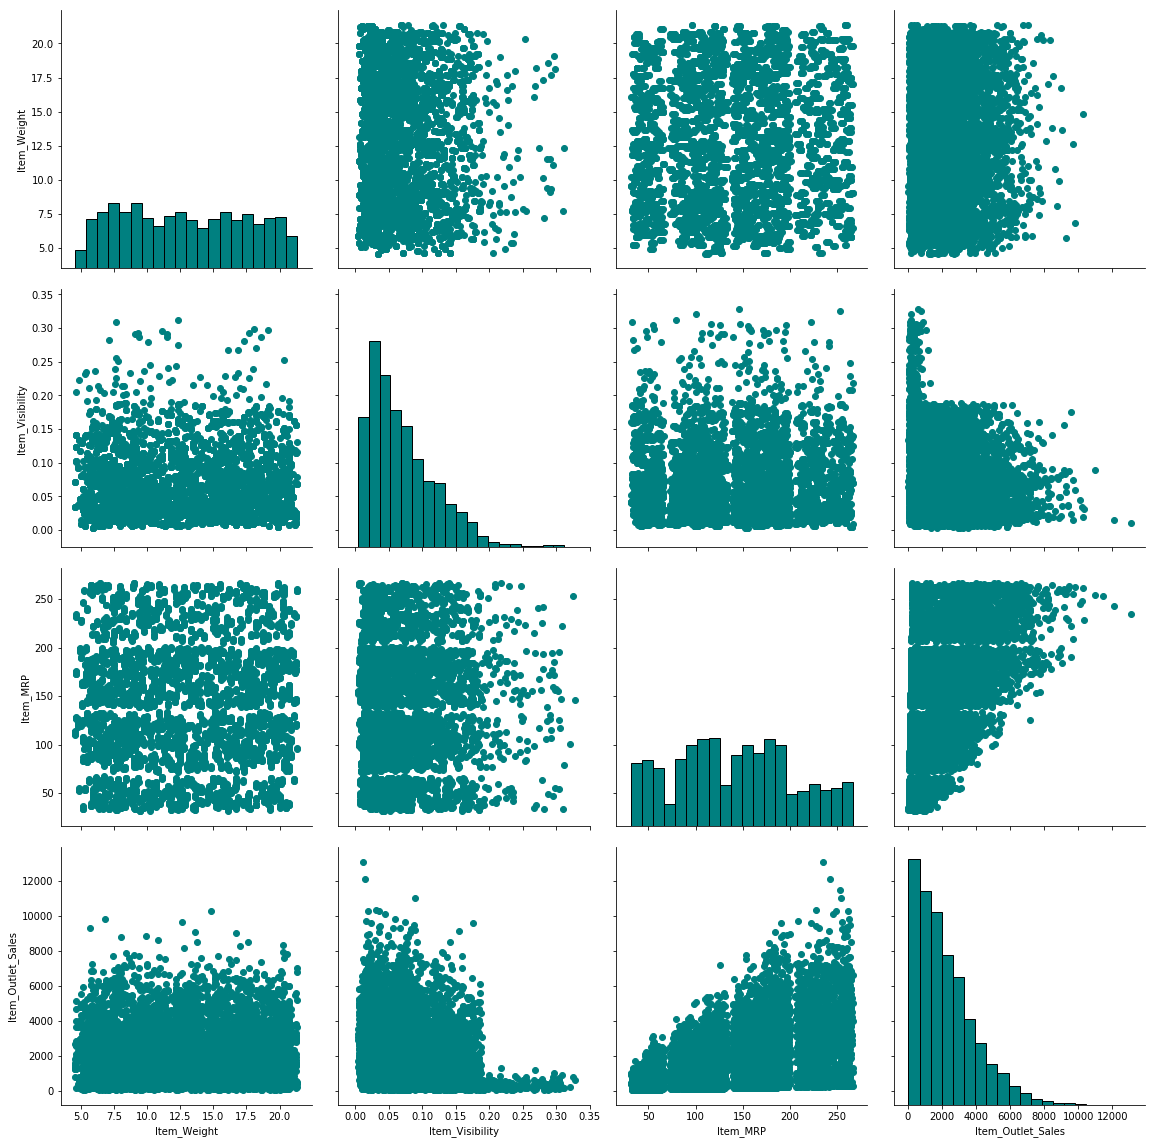

In [39]:
grid=sns.PairGrid(data=continuous_features,vars=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'],height=4)
grid.map_upper(plt.scatter,color='teal')
grid.map_diag(plt.hist,bins=20,edgecolor='black',color='teal')
grid.map_lower(plt.scatter,color='teal')

In [40]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [41]:
#Preprocessing & Visualization
#Imputing missing Item weights as per Item identifier
sales['source']='train'
test['source']='test'
combine=pd.concat([sales,test],ignore_index=True,sort=False)

In [42]:
combine.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [43]:
combine.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [44]:
#Imputing missing Item weight, visibility and outlet type by aggregate values
combine['Item_Weight'].fillna(combine.groupby('Item_Identifier')['Item_Weight'].transform('mean'),inplace=True)
combine['Item_Visibility'].fillna(combine.groupby('Item_Identifier')['Item_Visibility'].transform('mean'),inplace=True)
combine['Outlet_Size']=combine.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x:x.fillna(x.mode()[0]))

In [45]:
combine.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [46]:
#Correcting redundancy in Item fat content
combine['Item_Fat_Content']=combine['Item_Fat_Content'].map({'Low Fat':'Low Fat','low fat':'Low Fat','LF':'Low Fat'
                                        ,'Regular':'Regular','reg':'Regular'})

In [47]:
combine['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [48]:
#Creating broader category for Item type
combine['Item_Type_Combined']=combine['Item_Identifier'].apply(lambda x:x[0:2])

In [49]:
combine['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

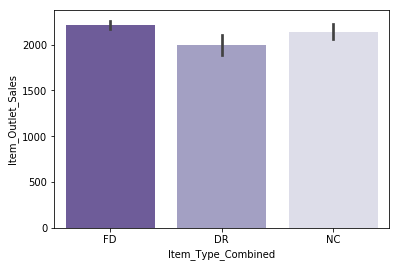

In [50]:
sns.barplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=combine,palette='Purples_r')

In [51]:
#Replacing fat_content of non-consumable items with - non-edible
combine.loc[combine['Item_Type_Combined']=='NC','Item_Fat_Content']='Non edible'

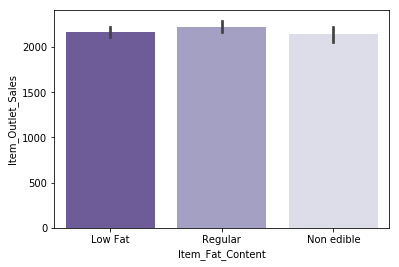

In [52]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combine,palette='Purples_r')

In [53]:
#Calculating years of operation of each outlet
combine['Outlet_years']=2013 - combine['Outlet_Establishment_Year']

In [54]:
combine['Outlet_years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_years, dtype: int64

In [55]:
combine['Outlet_years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_years, dtype: float64

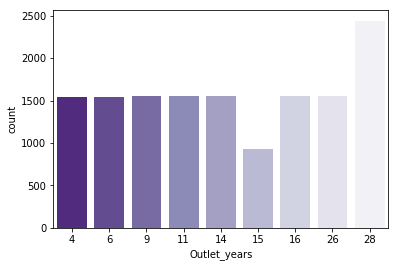

In [56]:
sns.countplot(x='Outlet_years',data=combine,palette='Purples_r')

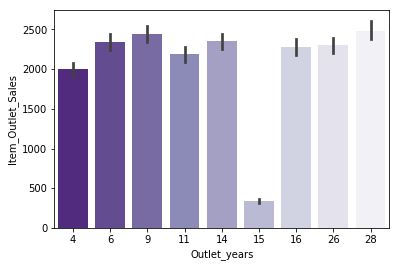

In [57]:
#Years of operation Vs sales
sns.barplot(x='Outlet_years',y='Item_Outlet_Sales',data=combine,palette='Purples_r')

In [58]:
combine.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,4


In [59]:
combine=pd.get_dummies(combine,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined','Outlet_Identifier'])

In [60]:
combine.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Outlet_years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Combined_DR              uint8
Item_Type_Combined_FD              uint8
Item_Type_Combin

In [61]:
#Dropping unnecassary columns
combine.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

In [62]:
combine.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Item_Outlet_Sales                float64
source                            object
Outlet_years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Combined_DR              uint8
Item_Type_Combined_FD              uint8
Item_Type_Combined_NC              uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifie

In [63]:
train=combine.loc[combine['source']=="train"]
test=combine.loc[combine['source']=="test"]

In [64]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
train.shape

(8523, 31)

In [66]:
train.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Item_Outlet_Sales                float64
Outlet_years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Combined_DR              uint8
Item_Type_Combined_FD              uint8
Item_Type_Combined_NC              uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifie

In [67]:
test.shape

(5681, 30)

In [68]:
test.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Combined_DR              uint8
Item_Type_Combined_FD              uint8
Item_Type_Combined_NC              uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifie

In [69]:
#Model building
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [70]:
X.shape

(8523, 30)

In [71]:
y.shape

(8523,)

In [72]:
X_train.shape

(5710, 30)

In [73]:
X_test.shape

(2813, 30)

In [74]:
#Benchmark model - Linear regression
from sklearn.linear_model import LinearRegression
reg0=LinearRegression()
reg0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
y_pred=reg0.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms0=sqrt(mean_squared_error(y_test,y_pred))
rms0

1099.8351478687437

In [77]:
#Ridge regression
from sklearn.linear_model import Ridge
reg1=Ridge(alpha=20,random_state=42)
reg1.fit(X_train,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [78]:
y_pred=reg1.predict(X_test)
rms1=sqrt(mean_squared_error(y_test,y_pred))
rms1

1099.6780262310674

In [79]:
#Perform gridSearch on ridge regression
from sklearn.model_selection import GridSearchCV
grid1=GridSearchCV(estimator=reg1,param_grid={'alpha':[8,9,10,11,12,13]},cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid1.fit(X_train,y_train)
print('Best params for Ridge regr: ',grid1.best_params_)

Best params for Ridge regr:  {'alpha': 9}


In [80]:
reg1=Ridge(**grid1.best_params_,random_state=42)
reg1.fit(X_train,y_train)
y_pred=reg1.predict(X_test)
rms1=sqrt(mean_squared_error(y_test,y_pred))
rms1

1099.6753910285283

In [81]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
reg2=DecisionTreeRegressor(random_state=42)
reg2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [82]:
y_pred=reg2.predict(X_test)
rms2=sqrt(mean_squared_error(y_test,y_pred))
rms2

1511.0172110171466

In [83]:
#Grid search on decision tree
grid2=GridSearchCV(estimator=reg2,param_grid={'max_depth':[1,2,3,4,5],'min_samples_leaf':[4,5,6,7],'max_leaf_nodes':[18,20,21,22]},cv=10,
                   n_jobs=-1,scoring='neg_mean_squared_error')
grid2.fit(X_train,y_train)
print('best params for decision tree: ',grid2.best_params_)

best params for decision tree:  {'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 5}


In [84]:
reg2=DecisionTreeRegressor(**grid2.best_params_,random_state=42)
reg2.fit(X_train,y_train)
y_pred=reg2.predict(X_test)
rms2=sqrt(mean_squared_error(y_test,y_pred))
rms2

1070.3564777571185

In [85]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
reg3=RandomForestRegressor(random_state=42)
reg3.fit(X_train,y_train)
y_pred=reg3.predict(X_test)
rms3=sqrt(mean_squared_error(y_test,y_pred))
rms3

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1172.1602858447154

In [86]:
#Grid search on random forest
grid3=GridSearchCV(estimator=reg3,param_grid={'n_estimators':[30,50,70],'max_depth':[1,2,3,4,5],'min_samples_leaf':[6,7,8,9],'max_leaf_nodes':[18,20,21,22]},
                  cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid3.fit(X_train,y_train)
print('Best params for random forest : ',grid3.best_params_)

Best params for random forest :  {'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 8, 'n_estimators': 50}


In [87]:
reg3=RandomForestRegressor(**grid3.best_params_,random_state=42)
reg3.fit(X_train,y_train)
y_pred=reg3.predict(X_test)
rms3=sqrt(mean_squared_error(y_test,y_pred))
rms3

1058.4701393292594

In [88]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
reg4=GradientBoostingRegressor(random_state=42)
reg4.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
y_pred=reg4.predict(X_test)
rms4=sqrt(mean_squared_error(y_test,y_pred))
rms4

1059.9045002342552

In [90]:
#Grid search on gradient boosting
grid4=GridSearchCV(estimator=reg4,param_grid={'alpha':[0.1,0.2],'max_depth':[2,3],'max_leaf_nodes':[2,3,4],'n_estimators':[100,150,180],
                                             'min_samples_leaf':[5,6,7]},cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid4.fit(X_train,y_train)
print('Best params for gradient boosting : ',grid4.best_params_)

Best params for gradient boosting :  {'alpha': 0.1, 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 6, 'n_estimators': 150}


In [91]:
reg4=GradientBoostingRegressor(**grid4.best_params_,random_state=42)
reg4.fit(X_train,y_train)
y_pred=reg4.predict(X_test)
rms4=sqrt(mean_squared_error(y_test,y_pred))
rms4

1053.0684587692408

In [92]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
reg5=AdaBoostRegressor(random_state=42)
reg5.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42)

In [93]:
y_pred=reg5.predict(X_test)
rms5=sqrt(mean_squared_error(y_test,y_pred))
rms5

1337.9786375053225

In [94]:
#Grid search on Adaboost
grid5=GridSearchCV(estimator=reg5,param_grid={'n_estimators':[2,3,4,5,6,7],'learning_rate':[0.7,0.8,0.9,1.0,1.1]},
                   cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid5.fit(X_train,y_train)
print('Best params for Adaboost :',grid5.best_params_)

Best params for Adaboost : {'learning_rate': 0.9, 'n_estimators': 5}


In [95]:
reg5=AdaBoostRegressor(**grid5.best_params_,random_state=42)
reg5.fit(X_train,y_train)
y_pred=reg5.predict(X_test)
rms5=sqrt(mean_squared_error(y_test,y_pred))
rms5

1107.138089137251

In [96]:
#XGBoost
from xgboost import XGBRegressor
reg6=XGBRegressor(random_state=42)
reg6.fit(X_train,y_train)
y_pred=reg6.predict(X_test)
rms6=sqrt(mean_squared_error(y_test,y_pred))
rms6

[00:25:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1057.539592989465

In [97]:
#Grid search on xgboost
est=np.arange(50,1000,200)
lr=np.arange(0.01,0.2,0.1)
grid6=GridSearchCV(estimator=reg6,param_grid={'n_estimators':est,'learning_rate':lr,'max_depth':[2,4,6]},
                   cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid6.fit(X_train,y_train)
print('Best params for XGboost :',grid6.best_params_)

C:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:29:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best params for XGboost : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 850}


In [98]:
reg6=XGBRegressor(**grid6.best_params_,random_state=42)
reg6.fit(X_train,y_train)
y_pred=reg6.predict(X_test)
rms6=sqrt(mean_squared_error(y_test,y_pred))
rms6

[00:29:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1053.6888485237946

In [99]:
grid6=GridSearchCV(estimator=XGBRegressor(**grid6.best_params_,random_state=42),param_grid={'min_child_weight':[1,3,5],'subsample':[0.8,0.9,1],
                                                                                            'gamma':[0,0.2,0.4]},cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
grid6.fit(X_train,y_train)
print('Best params for XGboost :',grid6.best_params_)

C:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:33:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best params for XGboost : {'gamma': 0, 'min_child_weight': 5, 'subsample': 1}


In [100]:
reg6=XGBRegressor(learning_rate=0.01, max_depth= 2, n_estimators= 850,**grid6.best_params_,random_state=42)
reg6.fit(X_train,y_train)
y_pred=reg6.predict(X_test)
rms6=sqrt(mean_squared_error(y_test,y_pred))
rms6

[00:34:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1053.0300104445707

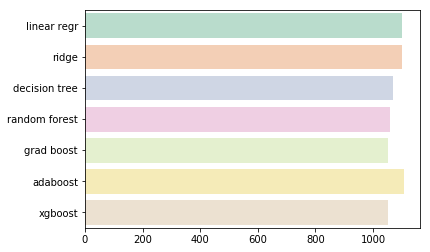

In [101]:
#Comparing RMS across all regressors
rms=[]
rms.append(rms0)
rms.append(rms1)
rms.append(rms2)
rms.append(rms3)
rms.append(rms4)
rms.append(rms5)
rms.append(rms6)
regr=['linear regr','ridge','decision tree','random forest','grad boost','adaboost','xgboost']
#Plot
sns.barplot(x=rms,y=regr,palette='Pastel2')

In [102]:
#Finalising XGboost as it has minimun RMS (can be tuned further)